In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

## Load the training data

In [2]:
root_dir = './'
local_path_soil = '/bd_mir_solo_without_xy.csv'
file_path_soil = root_dir + local_path_soil

df_soil_total = pd.read_csv(file_path_soil)

In [3]:
df_soil_total_data = df_soil_total.drop(['ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_total_target = pd.DataFrame(df_soil_total, columns=['Carbon_gkg'])

## Load the test data

In [4]:
df_soil_test_total = pd.read_csv('./bd_mir_solo_test_without_xy.csv')

In [5]:
df_soil_test_total_data = df_soil_test_total.drop(['ID','ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_test_total_target = pd.DataFrame(df_soil_test_total, columns=['Carbon_gkg'])

In [6]:
df_soil_test_total_data = df_soil_test_total_data.apply(lambda x:np.log(1/x))

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_soil_test_total_data)
df_soil_test_total_data_tr = pd.DataFrame(X,columns=df_soil_test_total_data.columns)

## Preprocess

In [8]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

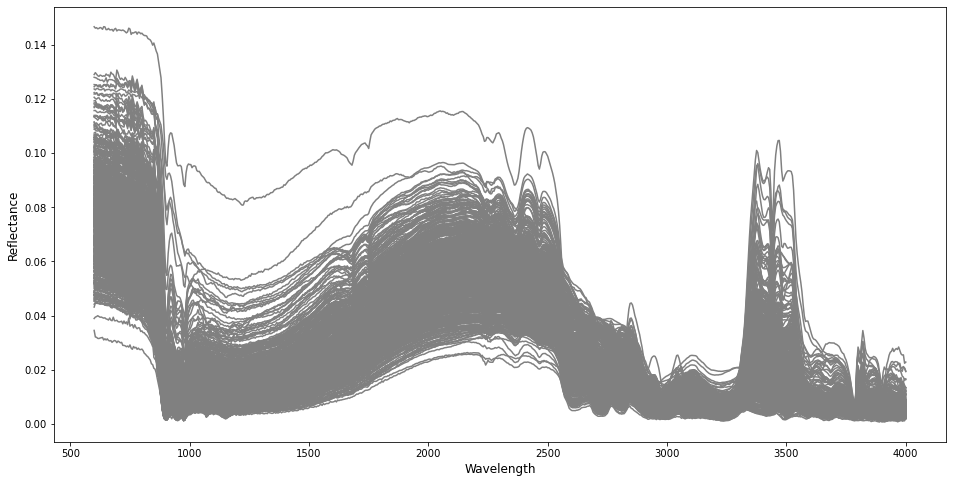

In [9]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_total_data)):
    
    test_row = df_soil_total_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [10]:
index_ex = df_soil_total_data['600'].idxmax()
df_soil_total_data = df_soil_total_data.drop(index=index_ex)
df_soil_total_target = df_soil_total_target.drop(index=index_ex)

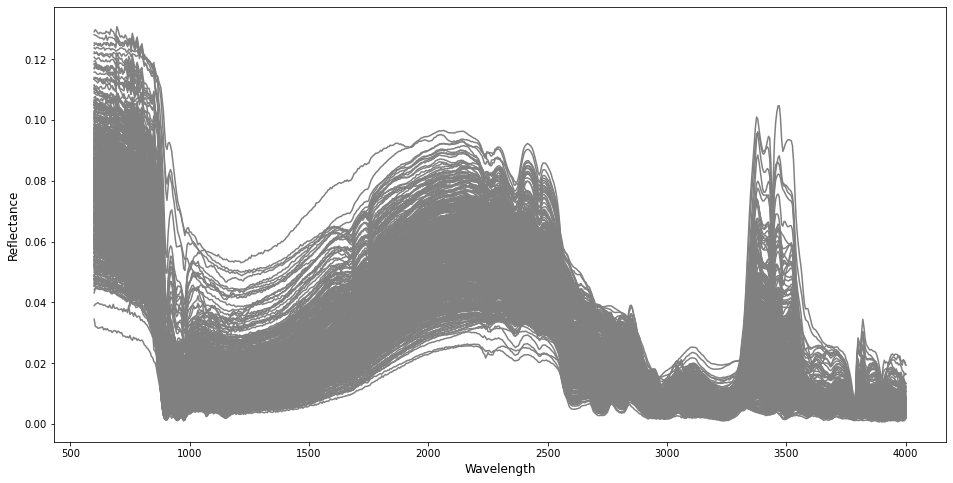

In [11]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_total_data)):
    
    test_row = df_soil_total_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [12]:
df_soil_total_data = df_soil_total_data.apply(lambda x:np.log(1/x))

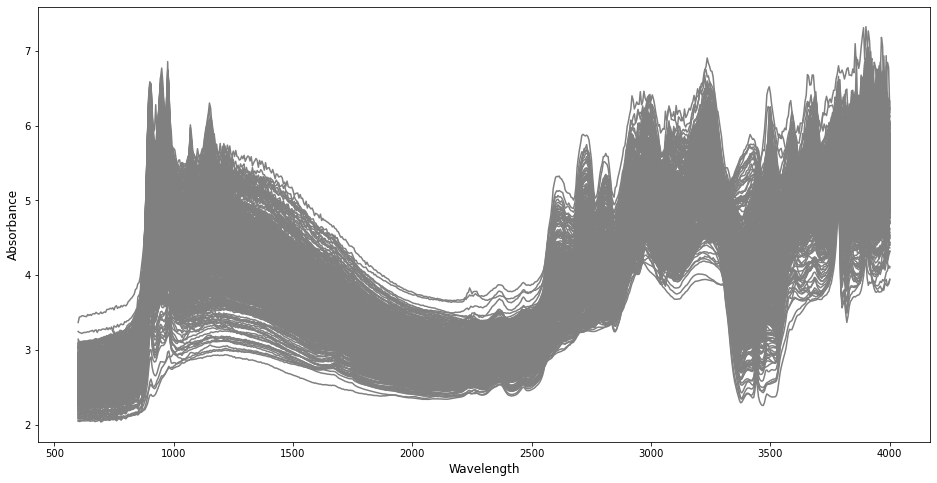

In [13]:
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_total_data)):
    
    test_row = df_soil_total_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [14]:
#Savitzky-Golay Filtering
import scipy
from scipy import signal

In [15]:
v = scipy.signal.savgol_filter(df_soil_total_data,21,3)
for i in range(len(df_soil_total_data)):
    for j in range(len(df_soil_total_data.iloc[i])):
        df_soil_total_data.iloc[i][j] = v[i][j]

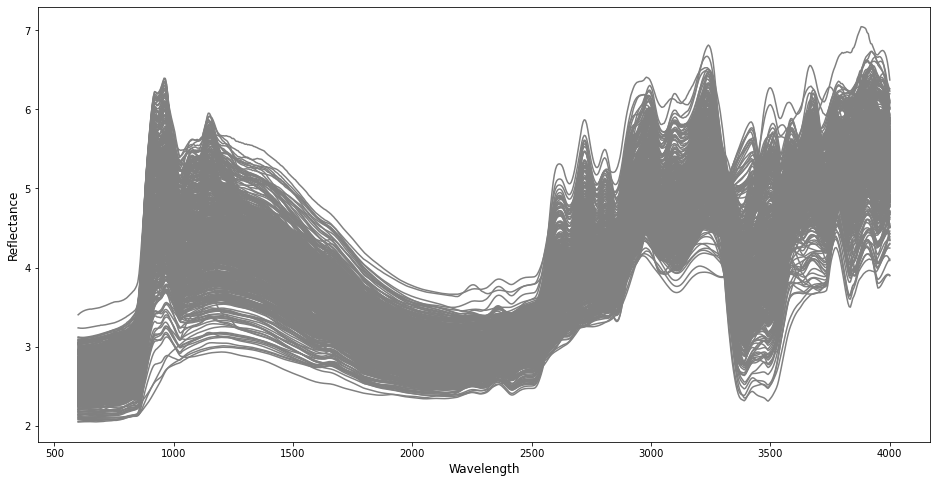

In [16]:
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_total_data)):
    
    test_row = df_soil_total_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [17]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

In [18]:
X = pipeline.fit_transform(df_soil_total_data)
df_soil_total_data_tr = pd.DataFrame(X,columns=df_soil_total_data.columns)
df_soil_total_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.807762,-0.802863,-0.798026,-0.793291,-0.788669,-0.784151,-0.779710,-0.775309,-0.770904,-0.766446,...,-0.309726,-0.259325,-0.198836,-0.129667,-0.053033,0.029859,0.117382,0.206522,0.291058,0.359243
1,-0.797207,-0.799874,-0.802265,-0.804485,-0.806613,-0.808705,-0.810804,-0.812936,-0.815124,-0.817382,...,-0.553798,-0.529666,-0.490052,-0.430988,-0.347177,-0.231503,-0.074708,0.133971,0.403128,0.729184
2,0.778360,0.783743,0.789105,0.794476,0.799857,0.805231,0.810564,0.815812,0.820923,0.825840,...,0.673661,0.715946,0.763883,0.816251,0.871612,0.927813,0.981025,1.023994,1.043516,1.019011
3,0.132913,0.146231,0.157139,0.165947,0.172961,0.178484,0.182815,0.186246,0.189066,0.191561,...,0.591745,0.537383,0.476379,0.409845,0.338702,0.263752,0.185861,0.106455,0.028572,-0.041481
4,0.039550,0.061795,0.081205,0.098143,0.112971,0.126050,0.137738,0.148388,0.158350,0.167969,...,0.570132,0.589222,0.603069,0.608910,0.603172,0.580948,0.535299,0.456624,0.333162,0.155372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,-0.506385,-0.513584,-0.518686,-0.521974,-0.523710,-0.524143,-0.523511,-0.522042,-0.519958,-0.517475,...,-0.645673,-0.669410,-0.689801,-0.704213,-0.709268,-0.700287,-0.670493,-0.610103,-0.506260,-0.346530
535,-0.984986,-0.998473,-1.009144,-1.017382,-1.023539,-1.027937,-1.030878,-1.032647,-1.033517,-1.033754,...,0.110499,0.086396,0.064497,0.047350,0.037974,0.040134,0.058635,0.099405,0.168609,0.269309
536,0.982544,0.978042,0.973097,0.967809,0.962242,0.956432,0.950398,0.944144,0.937664,0.930950,...,0.148173,0.167148,0.184859,0.200844,0.214464,0.224737,0.230083,0.227940,0.214427,0.184797
537,0.124423,0.124053,0.124816,0.126562,0.129139,0.132391,0.136163,0.140297,0.144636,0.149022,...,0.257103,0.241452,0.243714,0.270172,0.328693,0.429269,0.584249,0.807173,1.107573,1.477960


In [19]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [25]:
scores = []
ne = [100,500,800,1000]
for n in ne:
    forest_reg_total = RandomForestRegressor(n_estimators=n)
    score = cross_val_score(forest_reg_total,df_soil_total_data_tr,df_soil_total_target,cv=5)
    score = score.mean()
    scores.append(score)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

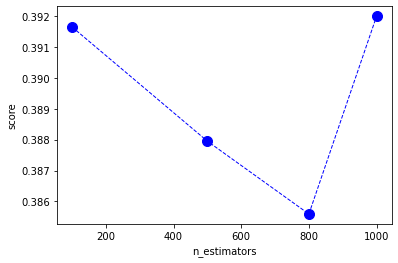

[0.39164619469821904,
 0.38794881777043083,
 0.38559178697134605,
 0.3919933463448004]

In [26]:
plt.plot(ne,scores,'bo',linestyle = 'dashed', linewidth = 1, markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()
scores

In [28]:
forest_reg_total = RandomForestRegressor(n_estimators=1000)
forest_reg_total.fit(df_soil_total_data_tr, df_soil_total_target)

<ipython-input-28-5ea206538130>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg_total.fit(df_soil_total_data_tr, df_soil_total_target)


RandomForestRegressor(n_estimators=1000)

In [20]:
import joblib
from sklearn.metrics import r2_score

In [31]:
Y = forest_reg_total.predict(df_soil_test_total_data_tr)
m = mean_squared_error(df_soil_test_total_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_total_target, Y)))

root_mean_squared_error: 6.708561966715022
R2: 0.17471766774982445


In [32]:
joblib.dump(forest_reg_total, './model/neossolo/forest_reg_total.pkl')

['./model/neossolo/forest_reg_total.pkl']

In [21]:
es = joblib.load('./model/total/forest_total.pkl')

In [22]:
Y = es.predict(df_soil_test_total_data_tr)
m = mean_squared_error(df_soil_test_total_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_total_target, Y)))

root_mean_squared_error: 6.508555115701758
R2: 0.2231935013196824


D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

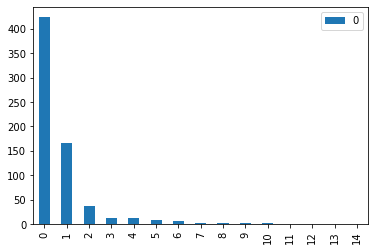

In [23]:
#PCA
df_soil_total_data_tr_ = df_soil_total_data_tr
ew_total, ev_total = np.linalg.eig(np.cov(df_soil_total_data_tr_.T))
ew_total_order = np.argsort(ew_total)[::-1]
ew_total_sort = ew_total[ew_total_order]
ev_total_sort = ev_total[:,ew_total_order]
pd.DataFrame(ew_total_sort[0:15]).plot(kind='bar')

In [25]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [42]:
pca_total = PCA(n_components=40)
pca_total.fit(df_soil_total_data_tr)
df_soil_total_data_tr_pca = pca_total.transform(df_soil_total_data_tr)

ols_total = linear_model.LinearRegression()
ols_total.fit(df_soil_total_data_tr_pca, df_soil_total_target)

LinearRegression()

In [43]:
df_soil_test_total_data_tr_pca = pca_total.transform(df_soil_test_total_data_tr)
Y = ols_total.predict(df_soil_test_total_data_tr_pca)
m = mean_squared_error(df_soil_test_total_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_total_target, Y)))

root_mean_squared_error: 7.23686410013723
R2: 0.039616896450799466


In [44]:
#PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [45]:
pls_model_total_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 5)}
gsearch = GridSearchCV(pls_model_total_setup, param_grid)
pls_model_total = gsearch.fit(df_soil_total_data_tr, df_soil_total_target)

In [46]:
Y = pls_model_total.predict(df_soil_test_total_data_tr)
m = mean_squared_error(df_soil_test_total_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_total_target, Y)))

root_mean_squared_error: 7.115376502903299
R2: 0.07159077532925073


## Model 2

In [35]:
# Use Lasso to find important features
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
df_soil_total_data_tr, df_soil_total_target
df_soil_test_total_data_tr, df_soil_test_total_target

In [20]:
lasso = Lasso()
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100,200,500]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_soil_total_data_tr, df_soil_total_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7450.7811124372565, tolerance: 4.1784878108360965
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7119.640560249639, tolerance: 3.9699089904527147
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7479.268011832914, tolerance: 4.311182276285017
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coord

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7586.492495383638, tolerance: 4.133530689247761
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7300.356142011012, tolerance: 3.9845925274885285
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6275.398825448356, tolerance: 3.568875245641354
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordin

{'alpha': 0.01}


D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2151.9675939624303, tolerance: 4.52731531358604
  model = cd_fast.enet_coordinate_descent(


In [25]:
para = {'alpha':[0.01,0.03,0.06,0.05,0.09]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_soil_total_data_tr, df_soil_total_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1917.1676932763794, tolerance: 4.1784878108360965
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1262.4758845813194, tolerance: 3.9699089904527147
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1162.0333481083399, tolerance: 4.311182276285017
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coo

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.79144528386314, tolerance: 3.9845925274885285
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.778126569690357, tolerance: 3.568875245641354
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.24244992115928, tolerance: 4.1784878108360965
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coord

{'alpha': 0.05}


D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.682293194156955, tolerance: 4.52731531358604
  model = cd_fast.enet_coordinate_descent(


In [26]:
lasso = Lasso(alpha=0.05)
lasso.fit(df_soil_total_data_tr, df_soil_total_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.682293194156955, tolerance: 4.52731531358604
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.05)

In [27]:
rele = np.round(lasso.coef_,5)

In [29]:
df_data_tr = pd.DataFrame(df_soil_total_data_tr,columns=df_soil_total_data_tr.columns)
indices = np.argsort(rele)[::-1]
cols = df_data_tr.columns[0:]
for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 40, cols[indices[f]], rele[indices[f]]))

 1) 4000                                     8.741630
 2) 1590                                     5.055710
 3) 630                                      4.164690
 4) 1445                                     3.675510
 5) 3465                                     2.326070
 6) 715                                      2.201360
 7) 1440                                     2.173270
 8) 1220                                     2.087690
 9) 625                                      1.171890
10) 1215                                     1.118470
11) 710                                      1.003230
12) 2865                                     0.941000
13) 3460                                     0.649670
14) 1425                                     0.551170
15) 635                                      0.459090
16) 3455                                     0.409790
17) 2875                                     0.191880
18) 2870                                     0.155340
19) 2655                    

In [30]:
def lasso_bands(df,num):
    index_lasso = []
    for f in range(num):
        index_lasso.append(str(cols[indices[f]]))
    df_bands_lasso = pd.DataFrame(df,columns=index_lasso)
    return df_bands_lasso

In [31]:
df_soil_total_data_tr_lasso = lasso_bands(df_soil_total_data_tr,19)
df_soil_test_total_data_tr_lasso = lasso_bands(df_soil_test_total_data_tr,19)

In [36]:
#Random forest
rf_total_lasso_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,20,50,100,200]}
gsearch = GridSearchCV(rf_total_lasso_setup, param_grid)
rf_total_lasso = gsearch.fit(df_soil_total_data_tr_lasso, df_soil_total_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [38]:
Y_predict_for_lasso = rf_total_lasso.predict(df_soil_test_total_data_tr_lasso)
m = mean_squared_error(df_soil_test_total_target, Y_predict_for_lasso)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_total_target, Y_predict_for_lasso)))

root_mean_squared_error: 6.608364394280188
R2: 0.1991860284646758
